# TP - HMMA238

Par Mathias Gout et Julie Røste.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Traceback (most recent call last):
  File "C:\Users\julie\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\julie\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\julie\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


## Exercice 1 - Le jeu de la vie

### Implémentation sans `numpy`

### Question 4:

In [2]:
from utils import calcul_nb_voisins
from utils import iteration_jeu

Z_init = [[0,0,0,0,0,0], 
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
     
calcul_nb_voisins(Z_init)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

`calcul_nb_voisins(Z)` affiche le nombre de voisins vivants de chaque cellules

### Question 5:

<IPython.core.display.Javascript object>


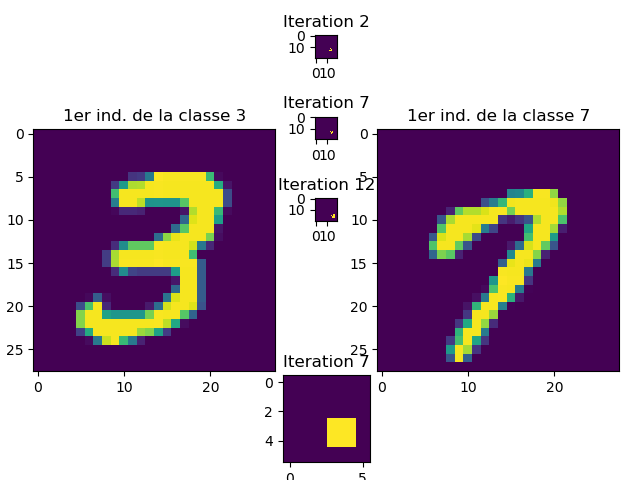

In [31]:
from utils import plotJeuDeLaVie
# On rappelle que l'on a renommé Z par Z_init
Z_init = [[0,0,0,0,0,0], 
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
plotJeuDeLaVie(10, np.asarray(Z_init), iteration_jeu)

### Question 6:

On remarque que les cellules vivantes de l'itération 0 sont disposées de la même façon que celles de l'itération 4. 
Entre l'itération 0 et 4, les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite.

A partir de l'itération 7, les cellules ne changent plus d'état. Les quatres cellules vivantes sont regroupées en bas à droite et ont toutes 3 voisins vivants (aucun décès possible). 
Comme aucune cellule morte n'a 3 voisins vivants (pas de naissance possible), il n'y aura pas d'évolution dans les prochaines itérations


### Implémentation avec `numba`

### Question 7:

In [4]:
from numba import jit

Les fonctions utilisant `numpy` sont `calcul_np_voisins_jit` et `iteration_jeu_jit`. 

In [5]:
from utils import calcul_nb_voisins_jit, iteration_jeu_jit

On commence par montrer que nos fonctions `calcul_nb_voisins_np` et `iteration_jeu_np` fonctionnent correctement.

In [6]:
Z_init = [[0,0,0,0,0,0],
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]

# Pour pouvoir l'utiliser dans calcul_nb_voisins_jit et iteration_jeu_jit
Z_np = np.array(Z_init)
print(calcul_nb_voisins_jit(Z_np))
iteration_jeu_jit(Z_np)

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

On obtient bien les résultats attendus.

On calcule maintenant les temps de calculs de `calcul_nb_voisins`, `iteration_jeu` (sans `numba`) et `calcul_nb_voisins_jit`, `iteration_jeu_jit` (avec `numba`).
<br/> On les comparera et on déterminera dans quel cas on obtient le meilleur résultat.

In [7]:
Z_init = [[0,0,0,0,0,0],
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
%timeit calcul_nb_voisins(Z_init)
%timeit iteration_jeu(Z_init)

20.7 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
30.2 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
Z_init = [[0,0,0,0,0,0],
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
%timeit calcul_nb_voisins_jit(Z_np)
%timeit iteration_jeu_jit(Z_np)

1.41 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
739 ns ± 7.81 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Les temps de calculs quand on utilise `numba` sont bien plus réduit.

### Question 8:

In [28]:
from ipywidgets import interact, fixed
from utils import plotJeuDeLaVie_manySP

In [32]:
n = 20
Z_huge = np.zeros((n,n))
Z_np = np.array( 
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16,10:16] = Z_np
interact(plotJeuDeLaVie_manySP, nbIterations=(0, 30, 1), Z=fixed(Z_huge), iter_func=fixed(iteration_jeu_jit))

interactive(children=(IntSlider(value=15, description='nbIterations', max=30), Output()), _dom_classes=('widget-interact',))

<function utils.plotJeuDeLaVie_manySP>

Avec $n=20$, la matrice `Z_huge` converge à partir de la $23^{ème}$ itération. 

On peut aussi comparer les temps de calculs de `iteration_jeu` et `iteration_jeu_jit` avec les matrices `Z_np` et `Z_huge`.

In [22]:
Z_huge = np.zeros((20, 20))
Z_np = np.array( 
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16,10:16] = Z_np

# On n'utilise pas numpy
%timeit iteration_jeu(Z_np)
%timeit iteration_jeu(Z_huge)

144 µs ± 51.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.47 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
Z_huge = np.zeros((20, 20))
Z_np = np.array( 
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16,10:16] = Z_np

# On utilise numba
%timeit iteration_jeu_jit(Z_np)
%timeit iteration_jeu_jit(Z_huge)

786 ns ± 6.95 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
The slowest run took 4.07 times longer than the fastest. This could mean that an intermediate result is being cached.
4.68 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Le fait d'utiliser numba est plus rapide et les calculs avec `Z_huge` sont aussi plus longs.

## Exercice 2 - Régression logistique

### Question 1:

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [15]:
X = mnist.data.astype('float64') 
y = mnist.target.astype('float64')

### Question 2:

In [33]:
# On garde que les 3 et 7
X = X[(y==3) + (y==7)] 
y = y[(y==3) + (y==7)] 

# Premier individu de la classe 3 et 7
premier_3 = np.where(y==3)[0][0]
premier_7 = np.where(y==7)[0][0]

# On affiche les 2 individus
plt.subplot(1, 2, 1)
plt.title("1er ind. de la classe 3")
plt.imshow(X[premier_3].reshape(28,28))
plt.subplot(1, 2, 2)
plt.title("1er ind. de la classe 7")
plt.imshow(X[premier_7].reshape(28,28))

### Question 3:

In [17]:
from sklearn.linear_model import LogisticRegression 

# Regression logistique 
reg_log = LogisticRegression(fit_intercept=False, solver='liblinear').fit(X, y)

### Question 4:

In [18]:
from ipywidgets import interact, fixed
from utils import fig_digit 

In [19]:
# Nous avons fait varier alpha de 1 en 1 pour plus de fluidité
interact(fig_digit, x=fixed(X[premier_7]), w=fixed(reg_log.coef_), alpha=(0.1,100,0.1));

interactive(children=(FloatSlider(value=50.00000000000001, description='alpha', min=0.1), Output()), _dom_classes=('widget-interact',))

### Question 5:

<IPython.core.display.Javascript object>


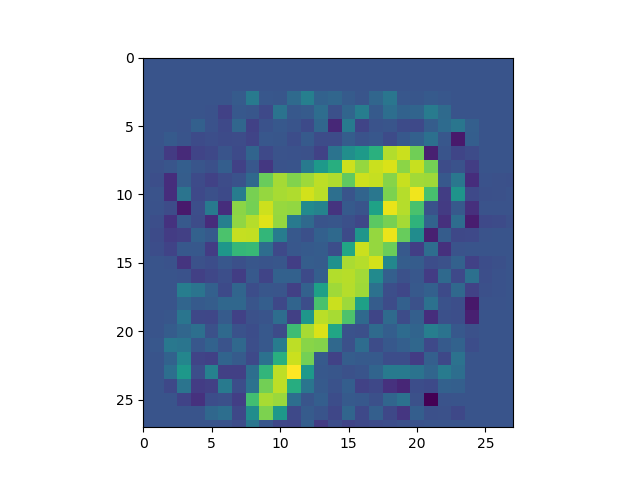

In [20]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(xlim=(0, 27), ylim=(27, 0))
ims = []

for i in range(100):
    im = fig_digit(X[premier_7], reg_log.coef_, i)
    ims.append([im])
    
anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

anim.to_html5_video()
plt.show()

### Question 6: 

De l'equation (1) en exercice 4, on peut écrire $\alpha$ comme: 
$$\alpha  = (x-x_{mod}) {||w||}^2 (w^Tx)^{-1}$$

C'est la taux d'apprentissage de l'algorithme __gradient descent__. 

### Question 7:

<IPython.core.display.Javascript object>


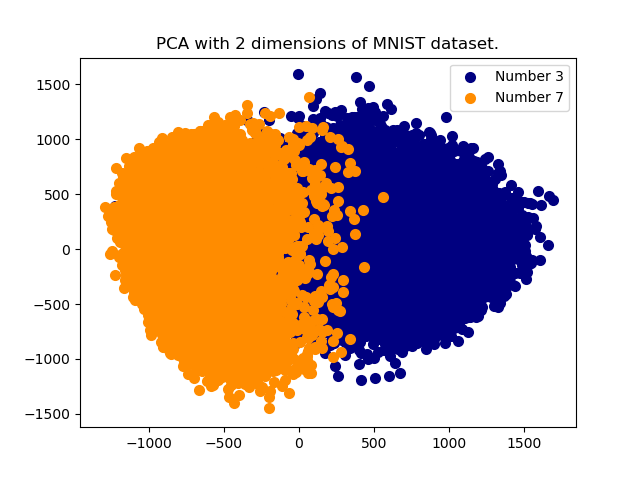

In [21]:
from sklearn.decomposition import PCA
n_components = 2

pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X)

colors = ['navy','darkorange'] #For number 3 and 7.

plt.figure()
for color, i, target_name in zip(colors,[3,7],['Number 3','Number 7']):
    plt.scatter(X_pca[y==i,0],X_pca[y==i,1],
                color=color,lw=2,label=target_name)
    plt.title('PCA with 2 dimensions of MNIST dataset.')
    plt.legend(loc='best',shadow=False,scatterpoints=1)

On voit que les deux groupes sont presque séparés. 